## Marketing Campaign Analysis: Facebook vs AdWords

### Business Problem
- We want to determine which ad platform (Facebook vs AdWords) delivers better performance in terms of clicks, conversions, and cost-effectiveness.

key features:
- Ad views: the number of times the ad was viewed
- Ad clicks: the number of clicks received on the ad
- Ad conversions: the number of conversions resulting from the ad
- Cost per Ad: the cost associated with running the Facebook/AdWords ad campaign
- Click-through-rate(CTR): the ratio of clicks to views, indicating the effectiveness of the ad in generating clicks
- conversion rate: the ratio of conversions to clicks, reflecting the effectiveness of the ad in driving desired actions
- cost per click(CPC): the average cost incurred per click on the ad

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.tsa.stattools import coint

import warnings
warnings.filterwarnings('ignore')

### Load the Data

In [2]:
df = pd.read_csv('/Users/yagezhang/Downloads/marketing_campaign.csv')
df.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,1/1/2019,FB_Jan19,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan19,4984,59,5,$194,1.18%,8.40%,$3.30
1,1/2/2019,FB_Jan19,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan19,4022,71,6,$75,1.77%,7.80%,$1.05
2,1/3/2019,FB_Jan19,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan19,3863,44,4,$141,1.13%,9.59%,$3.23
3,1/4/2019,FB_Jan19,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan19,3911,49,5,$141,1.26%,11.08%,$2.86
4,1/5/2019,FB_Jan19,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan19,4070,55,7,$133,1.36%,12.22%,$2.40


In [3]:
df.shape

(365, 17)

In [4]:
df.dtypes

Date                                               object
Facebook Ad Campaign                               object
Facebook Ad Views                                   int64
Facebook Ad Clicks                                  int64
Facebook Ad Conversions                             int64
Cost per Facebook Ad                               object
Facebook Click-Through Rate (Clicks / View)        object
Facebook Conversion Rate (Conversions / Clicks)    object
Facebook Cost per Click (Ad Cost / Clicks)         object
AdWords Ad Campaign                                object
AdWords Ad Views                                    int64
AdWords Ad Clicks                                   int64
AdWords Ad Conversions                              int64
Cost per AdWords Ad                                object
AdWords Click-Through Rate (Clicks / View)         object
AdWords Conversion Rate (Conversions / Click)      object
AdWords Cost per Click (Ad Cost / Clicks)          object
dtype: object

In [5]:
# convert date to datetime
df['Date'] = pd.to_datetime(df['Date'])

### Data Cleaning

In [6]:
# check null values
df.isnull().sum()

Date                                               0
Facebook Ad Campaign                               0
Facebook Ad Views                                  0
Facebook Ad Clicks                                 0
Facebook Ad Conversions                            0
Cost per Facebook Ad                               0
Facebook Click-Through Rate (Clicks / View)        0
Facebook Conversion Rate (Conversions / Clicks)    0
Facebook Cost per Click (Ad Cost / Clicks)         0
AdWords Ad Campaign                                0
AdWords Ad Views                                   0
AdWords Ad Clicks                                  0
AdWords Ad Conversions                             0
Cost per AdWords Ad                                0
AdWords Click-Through Rate (Clicks / View)         0
AdWords Conversion Rate (Conversions / Click)      0
AdWords Cost per Click (Ad Cost / Clicks)          0
dtype: int64

In [7]:
# check duplicates
df.duplicated().sum()

np.int64(0)

In [8]:
# define functions to clean currency and percent columns
def clean_currency(col):
    return col.replace('$','').replace(',','')

def clean_percent(col):
    return col.replace('%','')

# clean cost columns and convert to float
for col in ['Cost per Facebook Ad','Facebook Cost per Click (Ad Cost / Clicks)',
            'Cost per AdWords Ad','AdWords Cost per Click (Ad Cost / Clicks)']:
    df[col] = df[col].apply(clean_currency).astype(float)

# clean percentage columns and convert to float
for col in ['Facebook Click-Through Rate (Clicks / View)',
            'Facebook Conversion Rate (Conversions / Clicks)',
            'AdWords Click-Through Rate (Clicks / View)',
            'AdWords Conversion Rate (Conversions / Click)']:
    df[col] = df[col].apply(clean_percent).astype(float)

In [9]:
df.dtypes

Date                                               datetime64[ns]
Facebook Ad Campaign                                       object
Facebook Ad Views                                           int64
Facebook Ad Clicks                                          int64
Facebook Ad Conversions                                     int64
Cost per Facebook Ad                                      float64
Facebook Click-Through Rate (Clicks / View)               float64
Facebook Conversion Rate (Conversions / Clicks)           float64
Facebook Cost per Click (Ad Cost / Clicks)                float64
AdWords Ad Campaign                                        object
AdWords Ad Views                                            int64
AdWords Ad Clicks                                           int64
AdWords Ad Conversions                                      int64
Cost per AdWords Ad                                       float64
AdWords Click-Through Rate (Clicks / View)                float64
AdWords Co

### EDA

In [10]:
# descriptive stats of the campaigns
df.describe()

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
count,365,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.00000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2019-07-02 00:00:00,2179.687671,44.049315,11.742466,87.780822,2.201288,27.153288,2.187808,4717.19726,60.383562,5.980822,134.975342,1.295781,10.184356,2.377863
min,2019-01-01 00:00:00,1050.000000,15.000000,5.000000,34.000000,0.830000,21.480000,0.610000,3714.00000,31.000000,3.000000,73.000000,0.570000,6.130000,0.850000
25%,2019-04-02 00:00:00,1656.000000,35.000000,10.000000,63.000000,1.490000,23.800000,1.410000,4247.00000,49.000000,5.000000,110.000000,1.030000,7.700000,1.760000
50%,2019-07-02 00:00:00,2202.000000,43.000000,12.000000,88.000000,2.000000,26.770000,2.020000,4711.00000,60.000000,6.000000,135.000000,1.290000,9.930000,2.290000
75%,2019-10-01 00:00:00,2717.000000,54.000000,13.000000,111.000000,2.670000,28.970000,2.760000,5190.00000,73.000000,7.000000,162.000000,1.520000,12.030000,2.810000
max,2019-12-31 00:00:00,3320.000000,73.000000,19.000000,144.000000,5.370000,47.590000,7.140000,5760.00000,89.000000,9.000000,197.000000,2.250000,20.060000,5.650000
std,NaN,618.074639,12.140559,2.924786,28.263014,0.933193,4.165921,1.040820,561.11406,14.368225,1.628106,32.338304,0.338782,2.887445,0.856929


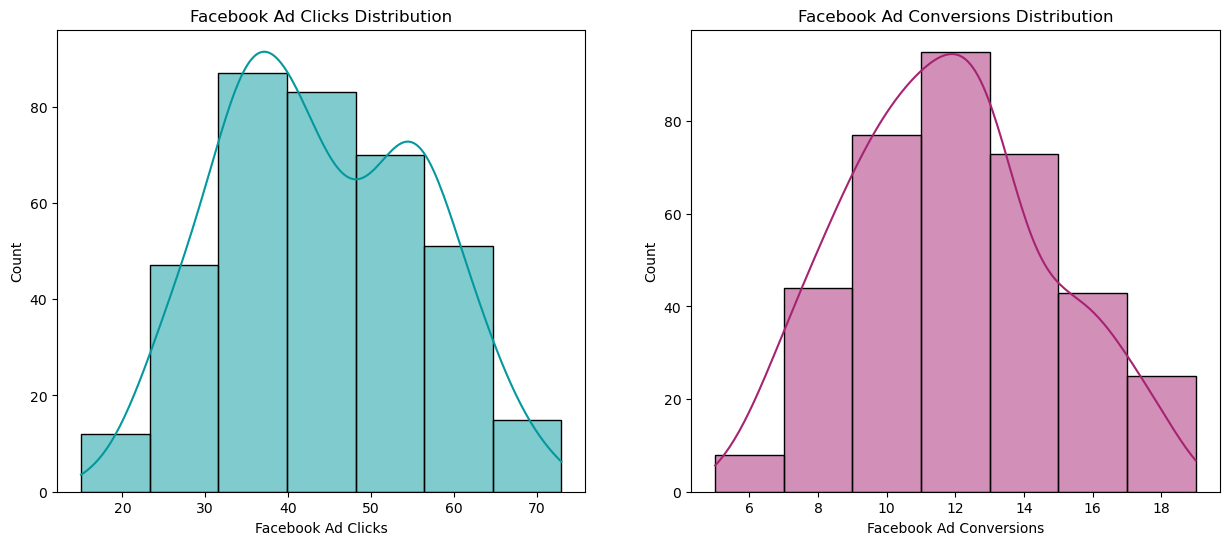

In [11]:
# Facebook Ad clicks and converisons distribution
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(df['Facebook Ad Clicks'], bins=7, kde=True, color='#03989E')
plt.title('Facebook Ad Clicks Distribution')
plt.subplot(1,2,2)
sns.histplot(df['Facebook Ad Conversions'], bins=7, kde=True, color='#A62372')
plt.title('Facebook Ad Conversions Distribution')
plt.show()

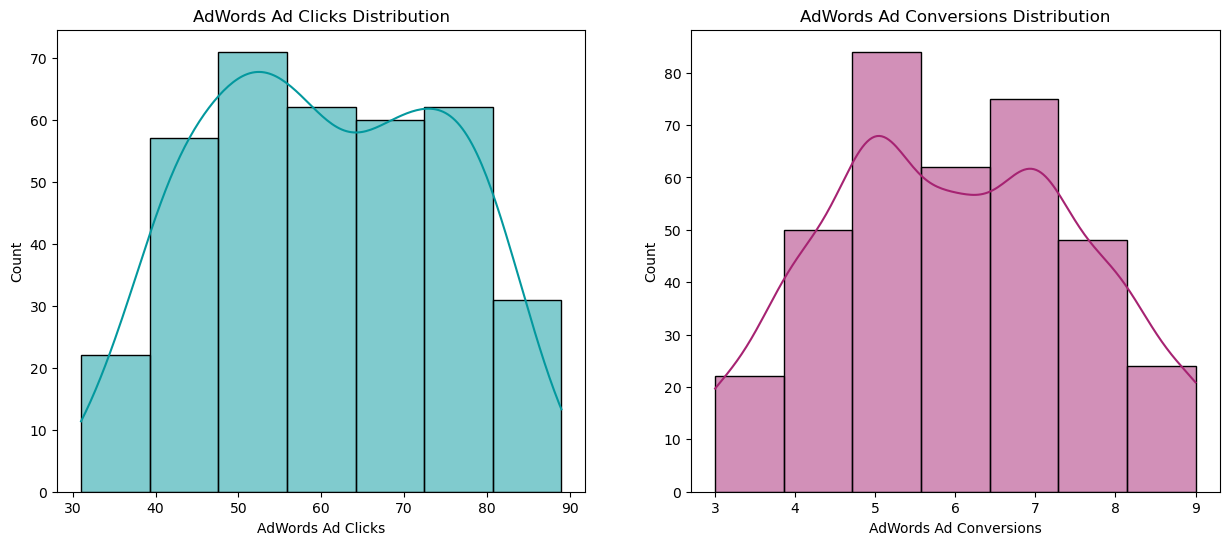

In [12]:
# AdWords Ad clicks and converisons distribution
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(df['AdWords Ad Clicks'], bins=7, kde=True, color='#03989E')
plt.title('AdWords Ad Clicks Distribution')
plt.subplot(1,2,2)
sns.histplot(df['AdWords Ad Conversions'], bins=7, kde=True, color='#A62372')
plt.title('AdWords Ad Conversions Distribution')
plt.show()

### Conversion Categories

In [13]:
# creating function to calculate the category for the conversions
def create_conversion_category(conversion_col):
    category = []
    for conversion in df[conversion_col]:
        if conversion < 6:
            category.append('less than 6')
        elif 6 <= conversion < 11:
            category.append('6 - 10')
        elif 11 <= conversion < 16:
            category.append('10 - 15')
        else:
            category.append('more than 15')
    return category

In [14]:
# applying function to both campaigns
df['Facebook Conversion Category'] = create_conversion_category('Facebook Ad Conversions')
df['AdWords Conversion Category'] = create_conversion_category('AdWords Ad Conversions')

# facebook frequency counts
facebook = df['Facebook Conversion Category'].value_counts().reset_index()
facebook.columns = ['Category','Facebook Days']
facebook

,Category,Facebook Days
0,10 - 15,189
1,6 - 10,128
2,more than 15,47
3,less than 6,1


In [15]:
# adwords frequency counts
adwords = df['AdWords Conversion Category'].value_counts().reset_index()
adwords.columns = ['Category','AdWords Days']
adwords

,Category,AdWords Days
0,6 - 10,209
1,less than 6,156


In [16]:
# merged for plotting
category_df = pd.merge(facebook, adwords, on='Category', how='outer').fillna(0)
category_df

,Category,Facebook Days,AdWords Days
0,10 - 15,189,0.0
1,6 - 10,128,209.0
2,less than 6,1,156.0
3,more than 15,47,0.0


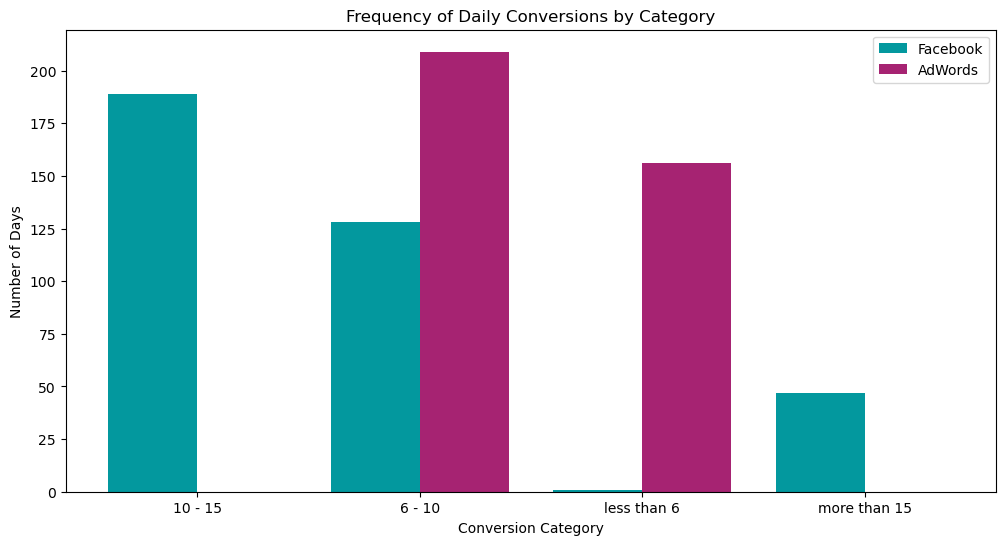

In [17]:
# plot conversion frequency
plt.figure(figsize=(12,6))
X_axis = np.arange(len(category_df))
plt.bar(X_axis - 0.2, category_df['Facebook Days'], 0.4, label='Facebook', color='#03989E')
plt.bar(X_axis + 0.2, category_df['AdWords Days'], 0.4, label='AdWords', color='#A62372')
plt.xticks(X_axis, category_df['Category'])
plt.xlabel("Conversion Category")
plt.ylabel("Number of Days")
plt.title("Frequency of Daily Conversions by Category")
plt.legend()
plt.show()

### Do more clicks lead to more conversions?

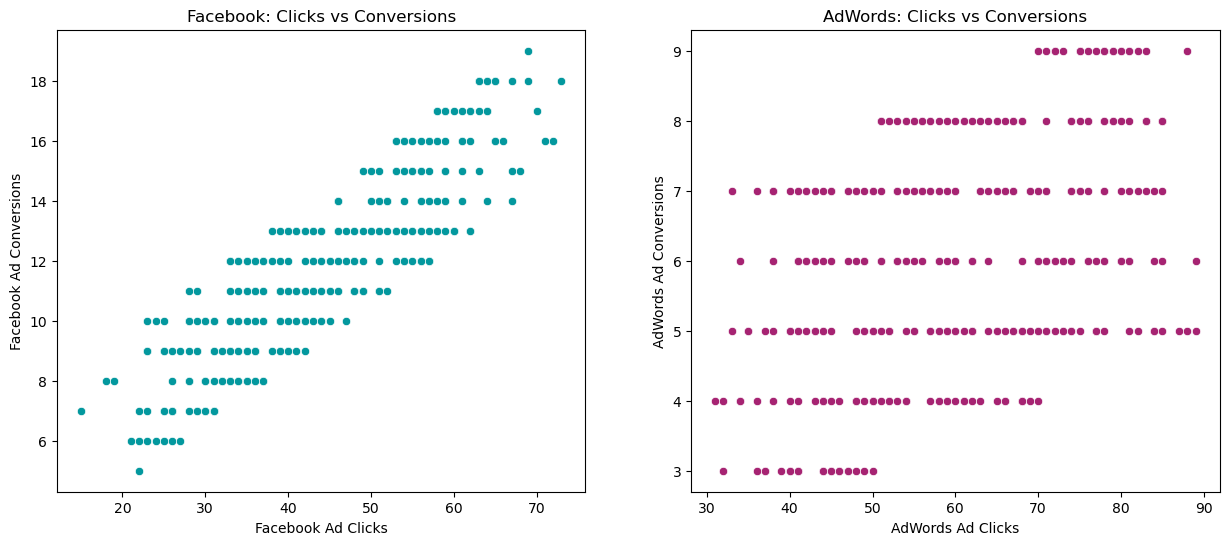

In [18]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.scatterplot(x=df['Facebook Ad Clicks'], y=df['Facebook Ad Conversions'], color='#03989E')
plt.title('Facebook: Clicks vs Conversions')

plt.subplot(1,2,2)
sns.scatterplot(x=df['AdWords Ad Clicks'], y=df['AdWords Ad Conversions'], color='#A62372')
plt.title('AdWords: Clicks vs Conversions')
plt.show()

### Correlation Analysis

In [19]:
facebook_corr = df[['Facebook Ad Conversions','Facebook Ad Clicks']].corr()
adwords_corr = df[['AdWords Ad Conversions','AdWords Ad Clicks']].corr()
print('Facebook Correlation:', round(facebook_corr.values[0,1],2)) 
print('AdWords Correlation:', round(adwords_corr.values[0,1],2)) 

Facebook Correlation: 0.87
AdWords Correlation: 0.45


### Hypothesis Testing
- Hypothesis: Advertising on Facebook will result in a greater number of conversions compared to advertising on AdWords.
- H0: Facebook conversions <= AdWords conversions
- H1: Facebook conversions > AdWords conversions

In [20]:
# average facebook and adwords ad conversions
print('Facebook:', round(df['Facebook Ad Conversions'].mean(),2))
print('AdWords:' , round(df['AdWords Ad Conversions'].mean(),2))

t_stats, p_value = st.ttest_ind(a = df['Facebook Ad Conversions'], 
                                b = df['AdWords Ad Conversions'], 
                                equal_var = False)

print('\nT statistic', t_stats)
print('\np-value',p_value)

# comparing the p value with the significance of 5% or 0.05
if p_value < 0.05:
    print("Reject the null hypothesis -> Facebook yields significantly higher conversions.")
else:
    print("Fail to reject H0 → No significant difference.")

Facebook: 11.74
AdWords: 5.98

T statistic 32.88402060758184

p-value 9.348918164530465e-134
Reject the null hypothesis -> Facebook yields significantly higher conversions.


### Predictive Modeling (Facebook clicks → conversions)

In [21]:
# independent variable
X = df[['Facebook Ad Clicks']]

# dependent variable
y = df[['Facebook Ad Conversions']]

# initializing and fitting Linear Regression model
reg_model = LinearRegression()
reg_model.fit(X,y)
prediction = reg_model.predict(X)

# model evaluation
r2 = r2_score(y, prediction)
mse = mean_squared_error(y, prediction)

print('Accuracy (R2 Score):',round(r2,2))
print('Mean Squared Error (MSE):', round(mse,2))

Accuracy (R2 Score): 0.76
Mean Squared Error (MSE): 2.02


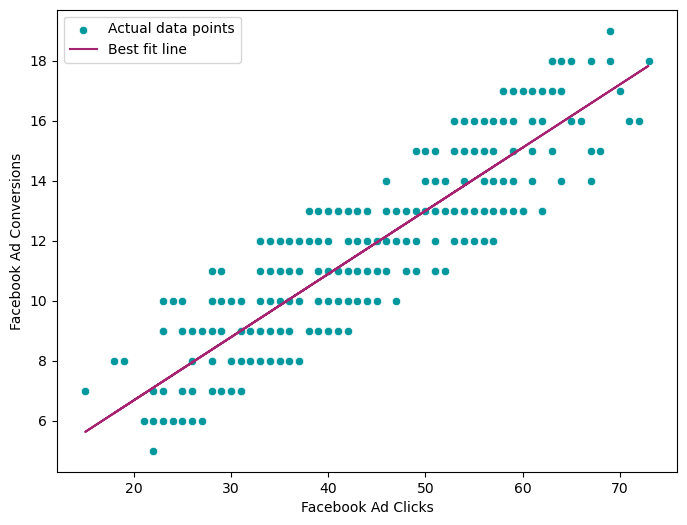

In [22]:
# plot regression line
plt.figure(figsize=(8,6))
sns.scatterplot(x = df['Facebook Ad Clicks'],y = df['Facebook Ad Conversions'], color = '#03989E', label = 'Actual data points')
plt.plot(df['Facebook Ad Clicks'], prediction, color = '#A62372', label = 'Best fit line')
plt.legend()
plt.show()

In [23]:
# predict for specific clicks
print("Predicted conversions for 30 clicks:", reg_model.predict([[30]])[0][0].round(2))
print("Predicted conversions for 50 clicks:", reg_model.predict([[50]])[0][0].round(2))
print("Predicted conversions for 80 clicks:", reg_model.predict([[80]])[0][0].round(2))

Predicted conversions for 30 clicks: 8.79
Predicted conversions for 50 clicks: 13.0
Predicted conversions for 80 clicks: 19.31


### Cost Effectiveness Analysis: Cost per Conversion

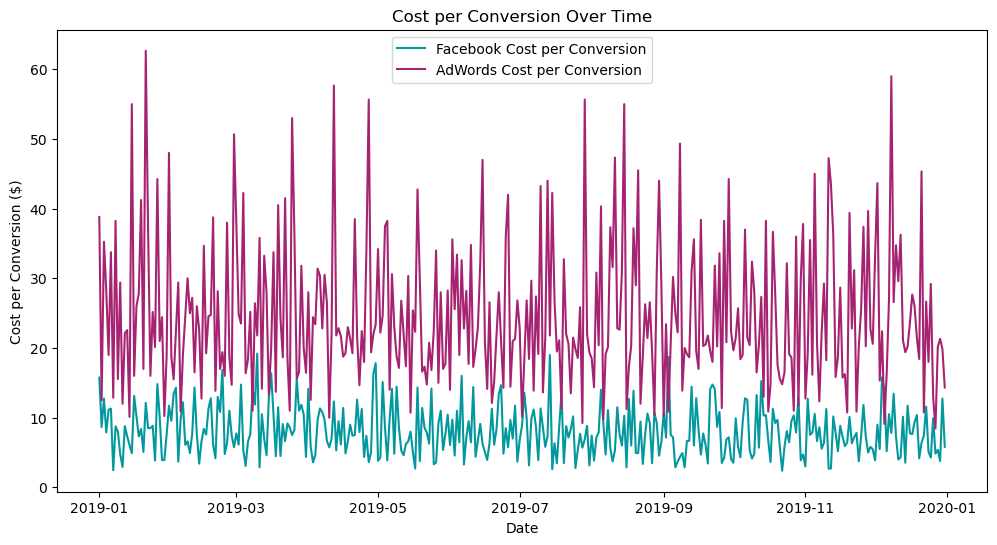

In [24]:
# calculate cost per conversion for both platform
df['Facebook Cost per Conversion'] = df['Cost per Facebook Ad'] / df['Facebook Ad Conversions']
df['AdWords Cost per Conversion'] = df['Cost per AdWords Ad'] / df['AdWords Ad Conversions']

# Plot Cost per Conversion
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Facebook Cost per Conversion'], label='Facebook Cost per Conversion', color='#03989E')
plt.plot(df['Date'], df['AdWords Cost per Conversion'], label='AdWords Cost per Conversion', color='#A62372')
plt.title("Cost per Conversion Over Time")
plt.ylabel("Cost per Conversion ($)")
plt.xlabel('Date')
plt.legend()
plt.show()

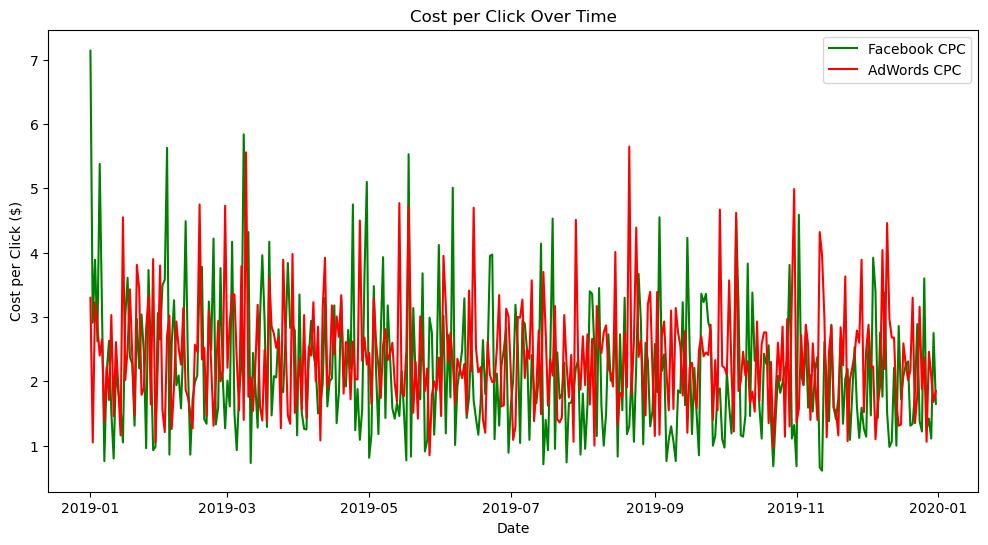

In [25]:
# plot cost per click distribution
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Facebook Cost per Click (Ad Cost / Clicks)'], label='Facebook CPC', color='green')
plt.plot(df['Date'], df['AdWords Cost per Click (Ad Cost / Clicks)'], label='AdWords CPC', color='red')
plt.title("Cost per Click Over Time")
plt.ylabel("Cost per Click ($)")
plt.xlabel("Date")
plt.legend()
plt.show()

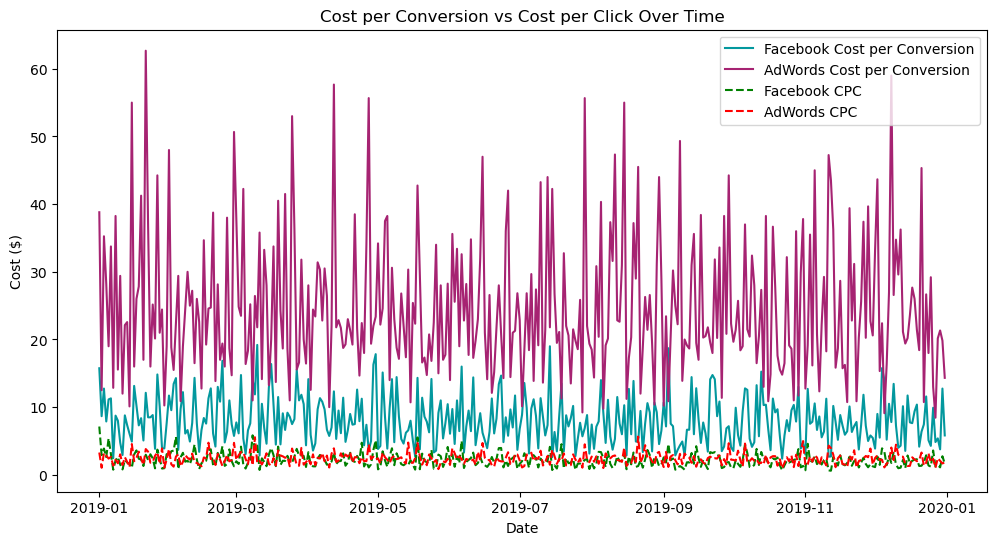

In [26]:
# compare cost per conversion and CPC for both platform
plt.figure(figsize=(12,6))

# cost per conversion
plt.plot(df['Date'], df['Facebook Cost per Conversion'], label='Facebook Cost per Conversion', color='#03989E', linestyle='-')
plt.plot(df['Date'], df['AdWords Cost per Conversion'], label='AdWords Cost per Conversion', color='#A62372', linestyle='-')

# cost per click
plt.plot(df['Date'], df['Facebook Cost per Click (Ad Cost / Clicks)'], label='Facebook CPC', color='green', linestyle='--')
plt.plot(df['Date'], df['AdWords Cost per Click (Ad Cost / Clicks)'], label='AdWords CPC', color='red', linestyle='--')

plt.title("Cost per Conversion vs Cost per Click Over Time")
plt.ylabel("Cost ($)")
plt.xlabel("Date")
plt.legend()
plt.show()

In [27]:
# average CPC
print('Facebook average CPC:', df['Facebook Cost per Click (Ad Cost / Clicks)'].mean())
print('AdWords average CPC:', df['AdWords Cost per Click (Ad Cost / Clicks)'].mean())

# average cost per conversion
print('Facebook average cost per conversion:', df['Facebook Cost per Conversion'].mean())
print('AdWords average cost per conversion:', df['AdWords Cost per Conversion'].mean())

# average conversion rate
print('Facebook average conversion rate:', df['Facebook Conversion Rate (Conversions / Clicks)'].mean())
print('AdWords average conversion rate:', df['AdWords Conversion Rate (Conversions / Click)'].mean())

Facebook average CPC: 2.1878082191780823
AdWords average CPC: 2.3778630136986303
Facebook average cost per conversion: 8.069772673700427
AdWords average cost per conversion: 24.71265166340509
Facebook average conversion rate: 27.153287671232874
AdWords average conversion rate: 10.184356164383562


### Long-term relationship test: cost vs conversions (Facebook)

In [28]:
score, p_value, _= coint(df['Cost per Facebook Ad'], df['Facebook Ad Conversions'])
print("Cointegration Score:", score)
print("Cointegration p-value:", p_value)
if p_value < 0.05:
    print("Long-term equilibrium exists between spend & conversions (Facebook).")
else:
    print("No long-term equilibrium detected.")

Cointegration Score: -14.755428385103219
Cointegration p-value: 2.133737597906132e-26
Long-term equilibrium exists between spend & conversions (Facebook).


### Long-term relationship test: cost vs conversions (AdWords)

In [29]:
score, p_value, _ = coint(df['Cost per AdWords Ad'], df['AdWords Ad Conversions'])
print("Cointegration Score:", score)
print("Cointegration p-value:", p_value)
if p_value < 0.05:
    print("Long-term equilibrium exists between spend & conversions (AdWords).")
else:
    print("No long-term equilibrium detected.")

Cointegration Score: -20.914038432427713
Cointegration p-value: 0.0
Long-term equilibrium exists between spend & conversions (AdWords).


### Summary
- Business Goal:
   - Maximize ROI by identifying which ad platform (Facebook vs AdWords) delivers better conversions and cost-effectiveness.
- Descriptive Findings:
   - Facebook averages ~11.7 conversions/day, AdWords ~6 conversions/day.
   - Facebook clicks strongly correlate with conversions (r=0.87), while AdWords correlation is weaker (r=0.45).
- Hypothesis Test:
   - Facebook produces significantly more conversions than AdWords (t=32.88, p<0.001).
- Cost Analysis:
   - AdWords has a lower cost per click, but Facebook delivers more conversions per dollar spent.
- Predictive Modeling:
   - Facebook conversions scale reliably with clicks (R² ≈ 0.76, MSE ≈ 2.02).
   - Predicted conversions for 30/50/80 clicks: 8.79, 13.0, 19.31.
- Long-term Relationship:
   - Spend and conversions are cointegrated for both platforms, indicating stable proportional impact over time.
   - AdWords has slightly stronger cointegration (score more negative, p-value≈0) → budget impact more predictable.

### Recommendation
- For maximum conversions, Facebook is better.
- For lower CPC and predictable ROI, AdWords is more cost-efficient.
- Optimal strategy: consider a balanced spend allocation, leveraging Facebook for volume and AdWords for efficiency.